In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

In [25]:
#Setup WebDriver with User-Agent to avoid detection
options = Options()
options.add_argument("--headless")  # Run without opening a browser 
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36")

In [27]:
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

In [28]:
#List of product search queries 
search_queries = {
    "Electronics & Computers": ["smart+phone", "gaming+laptop", "electronic+tablet"],
    "Home Decors": ["wall+clock", "decorative+lights", "ceramic+vase"],
    "Clothing & Accessories": ["men+clothes", "women+clothes", "wrist+watch"],
    "Beauty & Personal Care": ["face+moisturizer", "hair+shampoo", "makeup+kit"]
}

In [33]:
#Base URL for Amazon search results
base_url = "https://www.amazon.in/s?k={}&page={}"

In [35]:
titles, prices, ratings, num_reviews, categories_list = [], [], [], [], []

def extract_data(category):
    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Find all product listings
    products = soup.findAll('div', {'data-component-type': 's-search-result'})

    for product in products:
        # Extracting title
        name_tag = product.find('span')
        title = name_tag.get_text(strip=True) if name_tag else "Unknown"
        titles.append(title)

        # Extracting price
        price_tag = product.find('span', class_='a-price-whole')
        price = price_tag.get_text(strip=True) if price_tag else "0"
        prices.append(price)

        # Extracting rating
        rating_tag = product.find('span', class_="a-icon-alt")
        rating = rating_tag.get_text(strip=True).split()[0] if rating_tag else "0"
        ratings.append(rating)

        # Extracting number of reviews
        reviews_tag = product.find('span', class_='a-size-base s-underline-text')
        reviews = reviews_tag.get_text(strip=True) if reviews_tag else "0"
        num_reviews.append(reviews)

        # Store category
        categories_list.append(category)

# Scraping loop
for category, queries in search_queries.items():
    for query in queries:
        formatted_query = query  
        for page in range(1, 11):  
            url = base_url.format(formatted_query, page)
            print(f"Scraping: {url}")
            
            driver.get(url)
            time.sleep(random.uniform(4, 7)) 

            extract_data(category)  

Scraping: https://www.amazon.in/s?k=smart+phone&page=1
Scraping: https://www.amazon.in/s?k=smart+phone&page=2
Scraping: https://www.amazon.in/s?k=smart+phone&page=3
Scraping: https://www.amazon.in/s?k=smart+phone&page=4
Scraping: https://www.amazon.in/s?k=smart+phone&page=5
Scraping: https://www.amazon.in/s?k=smart+phone&page=6
Scraping: https://www.amazon.in/s?k=smart+phone&page=7
Scraping: https://www.amazon.in/s?k=smart+phone&page=8
Scraping: https://www.amazon.in/s?k=smart+phone&page=9
Scraping: https://www.amazon.in/s?k=smart+phone&page=10
Scraping: https://www.amazon.in/s?k=gaming+laptop&page=1
Scraping: https://www.amazon.in/s?k=gaming+laptop&page=2
Scraping: https://www.amazon.in/s?k=gaming+laptop&page=3
Scraping: https://www.amazon.in/s?k=gaming+laptop&page=4
Scraping: https://www.amazon.in/s?k=gaming+laptop&page=5
Scraping: https://www.amazon.in/s?k=gaming+laptop&page=6
Scraping: https://www.amazon.in/s?k=gaming+laptop&page=7
Scraping: https://www.amazon.in/s?k=gaming+laptop&

In [37]:
#Close the browser after scraping
driver.quit()

## Loading Data

In [41]:
df = pd.DataFrame({
    "Category": categories_list,
    "Title": titles,
    "Price (INR)": prices,
    "Rating": ratings,
    "Number of Reviews": num_reviews
})

In [43]:
#Save to CSV
df.to_csv("Amazon_all_Products.csv", index=False)

In [74]:
data = pd.read_csv(r"C:\Users\prane\Downloads\Amazon_all_Products.xls")

In [76]:
data.shape

(4449, 5)

In [78]:
data.head(50)

,Category,Title,Price (INR),Rating,Number of Reviews
0,Electronics & Computers,SponsoredSponsoredYou are seeing this ad based...,"19,999",3.6,250
1,Electronics & Computers,SponsoredSponsoredYou are seeing this ad based...,"8,299",4.2,403
2,Electronics & Computers,"Samsung Galaxy A05 (Light Green, 6GB, 128GB St...","7,998",3.9,152
3,Electronics & Computers,"Amazon'sChoicefor ""smart phone""Redmi A3X (Midn...","6,298",4.1,30
4,Electronics & Computers,"Samsung Galaxy A05 (Black, 6GB, 128GB Storage)...","7,989",3.9,152
5,Electronics & Computers,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 8GB...","16,199",4.2,"60,868"
6,Electronics & Computers,"iQOO Z7 Pro 5G (Blue Lagoon, 8GB RAM, 256GB St...","19,499",4.4,"15,470"
7,Electronics & Computers,POCO C61 Mystical Green 4GB RAM 64GB ROM3.9 ou...,"5,899",3.9,142
8,Electronics & Computers,"realme NARZO N65 5G (Amber Gold 6GB RAM, 128GB...","11,499",4.1,"2,402"
9,Electronics & Computers,"Samsung Galaxy M35 5G (Daybreak Blue,8GB RAM,1...","16,499",4.1,"7,136"


In [80]:
data.tail(10)

,Category,Title,Price (INR),Rating,Number of Reviews
4439,Beauty & Personal Care,SponsoredSponsoredYou are seeing this ad based...,599,0.0,0
4440,Beauty & Personal Care,SponsoredSponsoredYou are seeing this ad based...,355,4.5,25
4441,Beauty & Personal Care,Best sellerin Cosmetic Bags+9 other colors/pat...,399,3.8,934
4442,Beauty & Personal Care,+35 other colors/patternsSponsoredSponsoredYou...,999,3.6,4
4443,Beauty & Personal Care,+3 other colors/patternsSponsoredSponsoredYou ...,499,3.8,604
4444,Beauty & Personal Care,SponsoredSponsoredYou are seeing this ad based...,674,0.0,0
4445,Beauty & Personal Care,+2 more colorsSponsoredSponsoredYou are seeing...,834,3.8,21
4446,Beauty & Personal Care,SponsoredSponsoredYou are seeing this ad based...,710,4.0,36
4447,Beauty & Personal Care,SponsoredSponsoredYou are seeing this ad based...,"1,099",5.0,2
4448,Beauty & Personal Care,SponsoredSponsoredYou are seeing this ad based...,799,4.0,3


In [82]:
data.shape

(4449, 5)

In [84]:
#Checking for current working directory
import os
os.getcwd()

'C:\\Users\\prane\\Data Science\\Projects'

## Data Preprocessing

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Category           4449 non-null   object 
 1   Title              4449 non-null   object 
 2   Price (INR)        4449 non-null   object 
 3   Rating             4449 non-null   float64
 4   Number of Reviews  4449 non-null   object 
dtypes: float64(1), object(4)
memory usage: 173.9+ KB


In [89]:
data = data.iloc[2:-2].reset_index(drop=True) 

In [91]:
data.head()

,Category,Title,Price (INR),Rating,Number of Reviews
0,Electronics & Computers,"Samsung Galaxy A05 (Light Green, 6GB, 128GB St...","7,998",3.9,152
1,Electronics & Computers,"Amazon'sChoicefor ""smart phone""Redmi A3X (Midn...","6,298",4.1,30
2,Electronics & Computers,"Samsung Galaxy A05 (Black, 6GB, 128GB Storage)...","7,989",3.9,152
3,Electronics & Computers,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 8GB...","16,199",4.2,"60,868"
4,Electronics & Computers,"iQOO Z7 Pro 5G (Blue Lagoon, 8GB RAM, 256GB St...","19,499",4.4,"15,470"


In [93]:
# Strip spaces, convert to lowercase, and remove hidden characters
data["Title"] = data["Title"].str.strip().str.lower()


In [95]:
# Remove duplicate rows based on the 'Title' column, keeping the first occurrence
data_cleaned = data.drop_duplicates(subset=["Title"], keep="first")

In [97]:
data_cleaned.shape

(4177, 5)

In [99]:
data_cleaned.duplicated().sum()

0

In [101]:
data_cleaned.tail()

,Category,Title,Price (INR),Rating,Number of Reviews
4436,Beauty & Personal Care,sponsoredsponsoredyou are seeing this ad based...,"1,299",0.0,0
4437,Beauty & Personal Care,sponsoredsponsoredyou are seeing this ad based...,599,0.0,0
4438,Beauty & Personal Care,sponsoredsponsoredyou are seeing this ad based...,355,4.5,25
4440,Beauty & Personal Care,+35 other colors/patternssponsoredsponsoredyou...,999,3.6,4
4441,Beauty & Personal Care,+3 other colors/patternssponsoredsponsoredyou ...,499,3.8,604


In [103]:
data_cleaned = data[~data["Title"].str.contains("sponsored", case=False, na=False)].reset_index(drop=True)

In [105]:
data_cleaned.tail(10)

,Category,Title,Price (INR),Rating,Number of Reviews
3224,Beauty & Personal Care,earth rhythm lip care kit pack of 4 | gift set...,524,4.1,96
3225,Beauty & Personal Care,facescanada rose glow kit medium coverage rose...,727,4.1,24
3226,Beauty & Personal Care,house of quirk toiletry kit women jewelry orga...,299,3.9,"3,743"
3227,Beauty & Personal Care,minara makeup brush set of 10 with easy to car...,138,3.8,131
3228,Beauty & Personal Care,+5 more colorsdazller eyeshadow 10-in-1 palett...,350,4.0,54
3229,Beauty & Personal Care,inovera (label) faux leather double layer cosm...,349,4.1,77
3230,Beauty & Personal Care,utrust multipurpose 5 in 1 makeup book eyeshad...,790,5.0,1
3231,Beauty & Personal Care,zollyss clear plastic refillable travel toilet...,269,4.0,169
3232,Beauty & Personal Care,13-piece professional makeup brush set – vegan...,189,5.0,3
3233,Beauty & Personal Care,noy futuristic beauty high tech make up kit in...,299,0.0,0


In [107]:
data_cleaned.shape

(3234, 5)

In [109]:
data.dtypes

Category              object
Title                 object
Price (INR)           object
Rating               float64
Number of Reviews     object
dtype: object

In [111]:
data_cleaned["Price (INR)"] = data_cleaned["Price (INR)"].str.replace(',', '').astype(float)

In [113]:
data_cleaned["Number of Reviews"] = data_cleaned["Number of Reviews"].str.replace(r"[^0-9]", "", regex=True).astype(int)

In [115]:
data_cleaned.dtypes

Category              object
Title                 object
Price (INR)          float64
Rating               float64
Number of Reviews      int32
dtype: object

In [117]:
# Define rating categories
data_cleaned["Rating Category"] = data_cleaned["Rating"].apply(lambda x: "Good" if x >= 4 else "Average" if x >= 3 else "Bad")

In [119]:
data_cleaned.columns

Index(['Category', 'Title', 'Price (INR)', 'Rating', 'Number of Reviews',
       'Rating Category'],
      dtype='object')

In [121]:
data_cleaned.head(10)

,Category,Title,Price (INR),Rating,Number of Reviews,Rating Category
0,Electronics & Computers,"samsung galaxy a05 (light green, 6gb, 128gb st...",7998.0,3.9,152,Average
1,Electronics & Computers,"amazon'schoicefor ""smart phone""redmi a3x (midn...",6298.0,4.1,30,Good
2,Electronics & Computers,"samsung galaxy a05 (black, 6gb, 128gb storage)...",7989.0,3.9,152,Average
3,Electronics & Computers,"oneplus nord ce 3 lite 5g (chromatic gray, 8gb...",16199.0,4.2,60868,Good
4,Electronics & Computers,"iqoo z7 pro 5g (blue lagoon, 8gb ram, 256gb st...",19499.0,4.4,15470,Good
5,Electronics & Computers,poco c61 mystical green 4gb ram 64gb rom3.9 ou...,5899.0,3.9,142,Average
6,Electronics & Computers,"realme narzo n65 5g (amber gold 6gb ram, 128gb...",11499.0,4.1,2402,Good
7,Electronics & Computers,"samsung galaxy m35 5g (daybreak blue,8gb ram,1...",16499.0,4.1,7136,Good
8,Electronics & Computers,best sellerin electronicsiqoo z9 lite 5g (moch...,11499.0,4.1,3382,Good
9,Electronics & Computers,"redmi 13 5g, orchid pink, 6gb+128gb | india de...",12450.0,3.9,3289,Average


In [123]:
data_cleaned.isna().sum()

Category             0
Title                0
Price (INR)          0
Rating               0
Number of Reviews    0
Rating Category      0
dtype: int64

In [125]:
data_cleaned.describe(include = "all")

,Category,Title,Price (INR),Rating,Number of Reviews,Rating Category
count,3234,3234,3234.000000,3234.000000,3234.000000,3234
unique,4,3147,NaN,NaN,NaN,3
top,Home Decors,"tabelito tablet sleeve case cover for 9"" to 11...",NaN,NaN,NaN,Good
freq,918,5,NaN,NaN,NaN,1911
mean,NaN,NaN,5502.842610,3.846475,2488.505875,NaN
std,NaN,NaN,24525.256501,0.907965,8034.745925,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,299.000000,3.800000,51.000000,NaN
50%,NaN,NaN,479.000000,4.000000,340.000000,NaN
75%,NaN,NaN,828.500000,4.200000,1518.000000,NaN


In [127]:
# Saving the Preprocessed data into CSV

data_cleaned.to_csv("Amazon_Preprocessed_Data.csv", index=False)

## Distribution Analysis & Data Visualization

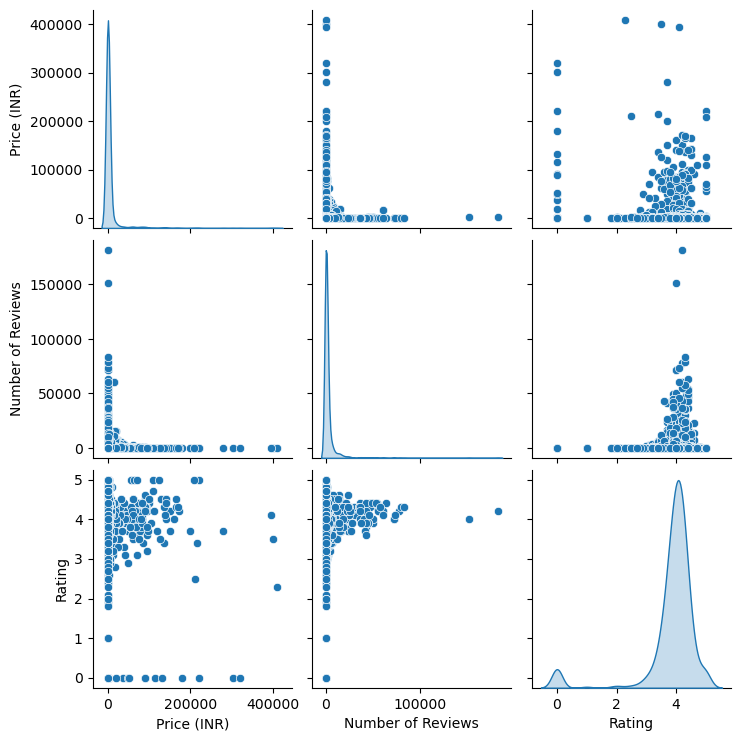

In [130]:
import matplotlib.pyplot as plt  
import seaborn as sns  
import numpy as np

num_cols = ['Price (INR)', 'Number of Reviews', 'Rating']
sns.pairplot(data_cleaned[num_cols], diag_kind="kde")  
plt.show()


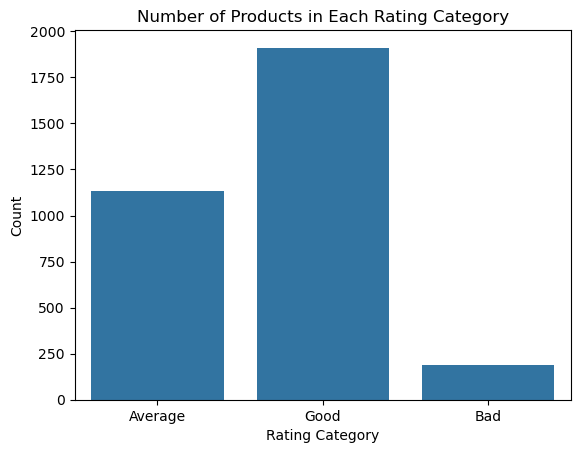

In [131]:
sns.countplot(x=data_cleaned["Rating Category"])  
plt.title("Number of Products in Each Rating Category")  
plt.xlabel("Rating Category")  
plt.ylabel("Count")  
plt.show()


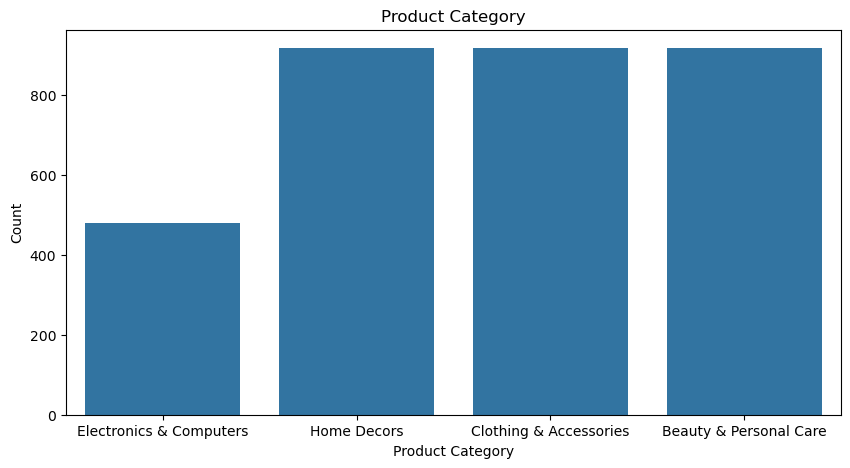

In [276]:
plt.figure(figsize = (10, 5))
sns.countplot(x=data_cleaned["Category"]) 
plt.title("Product Category")  
plt.xlabel("Product Category")  
plt.ylabel("Count")  
plt.show()


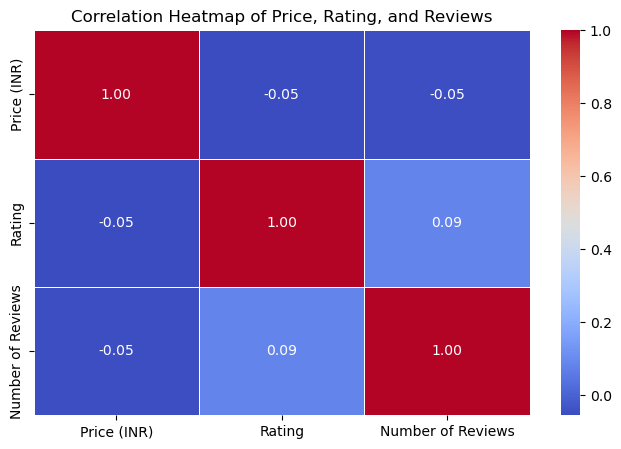

In [133]:
corr_matrix = data_cleaned[["Price (INR)", "Rating", "Number of Reviews"]].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Price, Rating, and Reviews")
plt.show()

### Unsupervised Learning

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

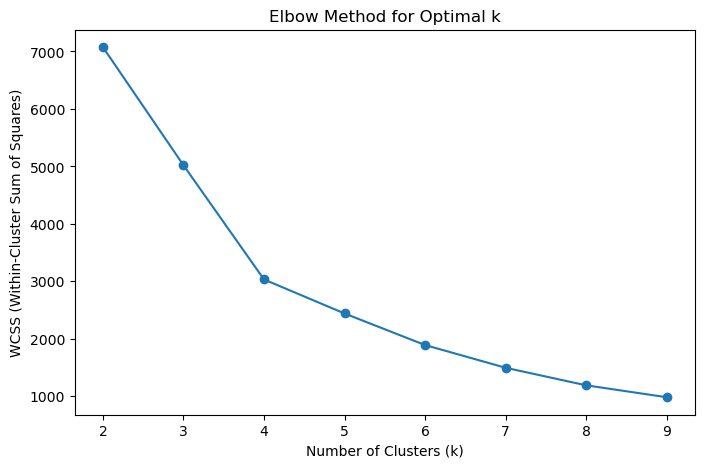

In [140]:
#Selecting features for clustering
features = ["Price (INR)", "Rating", "Number of Reviews"]
X = data_cleaned[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal K using the Elbow Method
wcss = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

#Choose k based on the elbow point
optimal_k = 3 

#Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data_cleaned["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

#### DBSCAN clustering

In [143]:
# Apply DBSCAN clustering
eps_value = 0.5  
min_samples_value = 5  

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
data_cleaned["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)

# Count unique clusters
print("DBSCAN Clusters:", np.unique(data_cleaned["DBSCAN_Cluster"]))


DBSCAN Clusters: [-1  0  1  2  3  4  5  6]


In [144]:
# Count number of noise points
noise_count = (data_cleaned["DBSCAN_Cluster"] == -1).sum()
print(f"Number of Noise Points: {noise_count}")

# Count number of points in each cluster
print("Cluster Distribution:")
print(data_cleaned["DBSCAN_Cluster"].value_counts())


Number of Noise Points: 43
Cluster Distribution:
DBSCAN_Cluster
 0    3010
 3     122
-1      43
 4      32
 1      11
 5       7
 6       5
 2       4
Name: count, dtype: int64


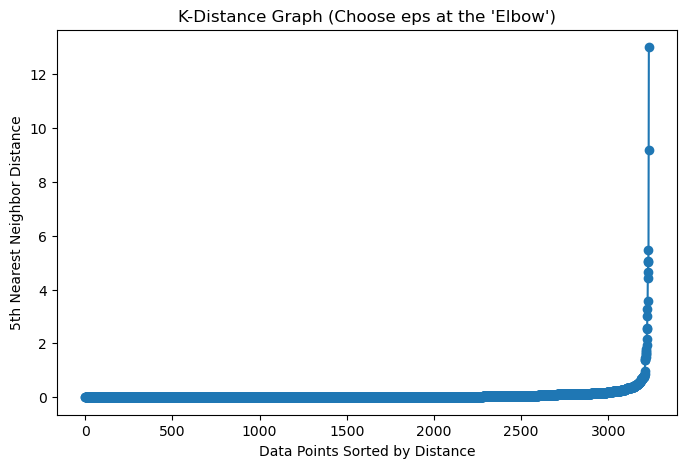

In [145]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Compute nearest neighbor distances
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(X_scaled)
distances, indices = nearest_neighbors.kneighbors(X_scaled)

# Sort distances for elbow method
sorted_distances = np.sort(distances[:, 4])

# Plot K-Distance Graph
plt.figure(figsize=(8, 5))
plt.plot(sorted_distances, marker="o")
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-Distance Graph (Choose eps at the 'Elbow')")
plt.show()


In [146]:
from sklearn.cluster import DBSCAN

# Adjusted parameters based on K-Distance plot
optimal_eps = 0.5  
optimal_min_samples = 8  

# Apply DBSCAN with fine-tuned parameters
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
data_cleaned["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)

# Display updated clusters
print("Updated DBSCAN Clusters:", np.unique(data_cleaned["DBSCAN_Cluster"]))
print(data_cleaned["DBSCAN_Cluster"].value_counts())


Updated DBSCAN Clusters: [-1  0  1  2  3]
DBSCAN_Cluster
 0    3010
 2     122
-1      66
 3      26
 1      10
Name: count, dtype: int64


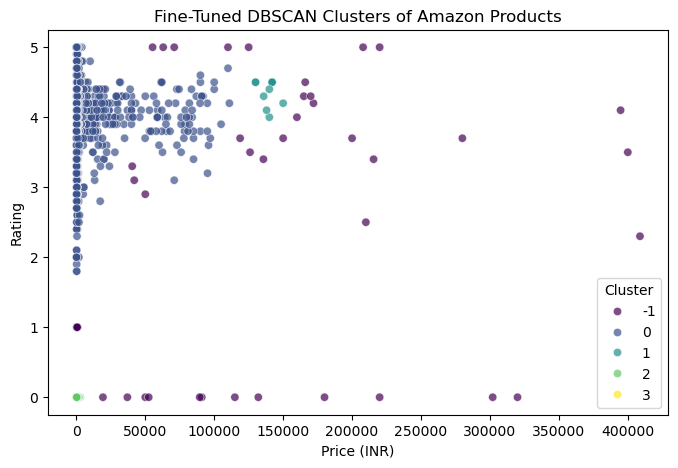

In [152]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_cleaned["Price (INR)"], y=data_cleaned["Rating"], hue=data_cleaned["DBSCAN_Cluster"], palette="viridis", alpha=0.7)
plt.xlabel("Price (INR)")
plt.ylabel("Rating")
plt.title("Fine-Tuned DBSCAN Clusters of Amazon Products")
plt.legend(title="Cluster")
plt.show()


#### Hierarchical Clustering

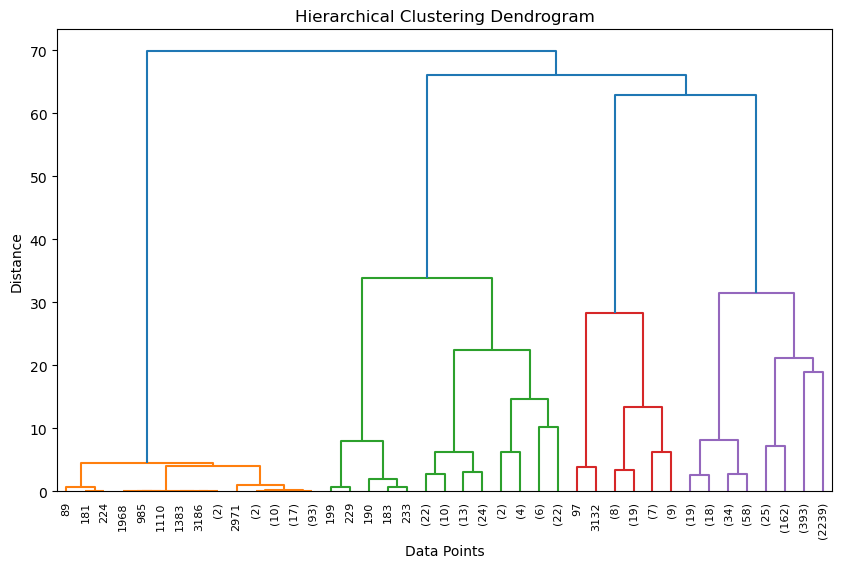

In [155]:

linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode="level", p=5)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Apply Agglomerative Clustering (based on dendrogram analysis)
hierarchical = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
data_cleaned["Hierarchical_Cluster"] = hierarchical.fit_predict(X_scaled)


In [156]:
from sklearn.metrics import silhouette_score


kmeans_score = silhouette_score(X_scaled, data_cleaned["KMeans_Cluster"])
hierarchical_score = silhouette_score(X_scaled, data_cleaned["Hierarchical_Cluster"])


if len(set(data_cleaned["DBSCAN_Cluster"])) > 1:
    dbscan_score = silhouette_score(X_scaled, data_cleaned["DBSCAN_Cluster"])
else:
    dbscan_score = -1  

# Print scores
print(f"K-Means Silhouette Score: {kmeans_score}")
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_score}")
print(f"DBSCAN Silhouette Score: {dbscan_score}")

# Map scores to DataFrame column names
scores = {
    "KMeans_Cluster": kmeans_score,
    "Hierarchical_Cluster": hierarchical_score,
    "DBSCAN_Cluster": dbscan_score
}

#Selecting the best model based on highest silhouette score
best_model = max(scores, key=scores.get)
print(f"\n Best Clustering Model: {best_model} (Highest Silhouette Score)")

#Assigning the best cluster labels and remove other cluster columns
data_cleaned["Best_Cluster"] = data_cleaned[best_model]
data_cleaned.drop(columns=["KMeans_Cluster", "Hierarchical_Cluster", "DBSCAN_Cluster"], inplace=True)




K-Means Silhouette Score: 0.7719228426873544
Hierarchical Clustering Silhouette Score: 0.7777182716113027
DBSCAN Silhouette Score: 0.7563078323476577

 Best Clustering Model: Hierarchical_Cluster (Highest Silhouette Score)


In [159]:
data_cleaned.to_csv("Amazon_Clustered_Data.csv", index=False)
print("File Saved !")

File Saved !


## SQL Connectivity

In [ ]:
pip install mysql-connector-python


In [ ]:
pip install pymysql

In [ ]:
import pymysql
import pandas as pd


In [33]:
connection = pymysql.connect(host='localhost',
    user='root',
    passwd='Praneetha@12',
    db='kgisl')
cursor = connection.cursor()

In [37]:
# Load CSV file
file_path = r"C:\Users\prane\Downloads\Amazon_Clustered_Data.xls"
df = pd.read_csv(file_path)

In [43]:
# Insert data into MySQL
for _, row in df.iterrows():
    insert_query = """
    INSERT INTO amazon__products (Category,Title,Price,Rating,Reviews,Rating_Category,Best_Cluster)
    VALUES (%s, %s, %s, %s, %s, %s, %s);
    """
    cursor.execute(insert_query, (row['Category'], row['Title'], row['Price (INR)'], row['Rating'], row['Number of Reviews'],
                                  row['Rating Category'], row['Best_Cluster']))

# Commit and close connection
connection.commit()
cursor.close()
connection.close()

print("Data inserted successfully!")

Data inserted successfully!


## Supervised Learning  

In [162]:
data_cleaned['Category'].unique()

array(['Electronics & Computers', 'Home Decors', 'Clothing & Accessories',
       'Beauty & Personal Care'], dtype=object)

In [164]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer


In [165]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prane\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [168]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [170]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_cleaned['category_encoded'] = label_encoder.fit_transform(data_cleaned['Category'])

In [172]:
data_cleaned.columns

Index(['Category', 'Title', 'Price (INR)', 'Rating', 'Number of Reviews',
       'Rating Category', 'Best_Cluster', 'category_encoded'],
      dtype='object')

In [239]:
def preprocess_data(text):
    if not isinstance(text, str) or text is None:  
        return ""

    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters, numbers, and symbols
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    tokenized = word_tokenize(text)  # Tokenize words
    stop_words_removed = [word for word in tokenized if word not in stop_words]  # Remove stopwords
    lemmatized = [lemmatizer.lemmatize(word) for word in stop_words_removed]  # Lemmatization

    return ' '.join(lemmatized)

In [241]:
preprocessed_data = data_cleaned["Title"].apply(preprocess_data)


In [243]:
preprocessed_data[0]

'samsung galaxy light green gb gb storage mp main camera upto gb ram ram plus mediatek helio g mah battery starsk bought past monthprice product pagemrp offup back amazon pay icici cardup back amazon pay icifree deliverywed febor fastest deliverytomorrow febservice installationadd cartremovemore buying choice new offer'

In [180]:
vectorizer = CountVectorizer()

In [182]:
X_train,X_test, y_train,y_test = train_test_split(preprocessed_data, data_cleaned['Category'], test_size=0.2, random_state=42)

In [184]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [186]:
smote = SMOTE(random_state = 42)
x_new_train,y_train_new = smote.fit_resample(X_train_vec, y_train)

In [188]:
model_NB = MultinomialNB()

In [190]:
model_NB.fit(X_train_vec,y_train)

MultinomialNB()

In [192]:
y_pred_NB = model_NB.predict(X_test_vec)

In [194]:
print("Accuracy:", accuracy_score(y_test, y_pred_NB))
print("Classification Report:\n", classification_report(y_test, y_pred_NB))

Accuracy: 0.9953632148377125
Classification Report:
                          precision    recall  f1-score   support

 Beauty & Personal Care       0.99      1.00      0.99       167
 Clothing & Accessories       1.00      0.99      0.99       178
Electronics & Computers       0.99      1.00      1.00       119
            Home Decors       1.00      0.99      1.00       183

               accuracy                           1.00       647
              macro avg       0.99      1.00      1.00       647
           weighted avg       1.00      1.00      1.00       647



## New Predictions

In [267]:
import numpy as np

In [269]:
input = np.array(['''Lakme Rouge Bloom Matte Lip Liquid, Matte Finish, longlasting for up to 14 hours, quick drying & transfer-proof, 
infused with vita rose for smooth & moisturised lips - Majestic Magnolia'''])

In [271]:
new_preprocessed = preprocess_data(input)  
user_input_vec = vectorizer.transform([new_preprocessed])  

In [273]:
model_NB.predict(user_input_vec)

array(['Beauty & Personal Care'], dtype='<U23')